In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import sklearn.linear_model

## Task 1: Univariate Data Analysis for Data Quality Improvement

### Dataset
**This dataset is about forest fires in the Montesinho park in Portugal.** 

It contains meteorological data and other information that can be used to predict a fire in a certain area.

The dataset has 517 instances with 13 attributes. 

<details>
<summary>The features include:</summary>

- X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
- Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
- month - month of the year: "jan" to "dec" 
- day - day of the week: "mon" to "sun"
- FFMC - FFMC index from the FWI system: 18.7 to 96.20
- DMC - DMC index from the FWI system: 1.1 to 291.3 
- DC - DC index from the FWI system: 7.9 to 860.6 
- ISI - ISI index from the FWI system: 0.0 to 56.10
- temp - temperature in Celsius degrees: 2.2 to 33.30
- RH - relative humidity in %: 15.0 to 100
- wind - wind speed in km/h: 0.40 to 9.40 
- rain - outside rain in mm/m2 : 0.0 to 6.4 
- area - the burned area of the forest (in ha): 0.00 to 1090.84 

    this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform. 
</details>

[Source](https://www.kaggle.com/datasets/anitarostami/montesinho-forest-fire-prediction-dataset)

In [2]:
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Dataset imperfections:
* Skewed distributions ✅  

* Outliers ✅

* Missing values ❌

* Potential noise and data entry errors ❌

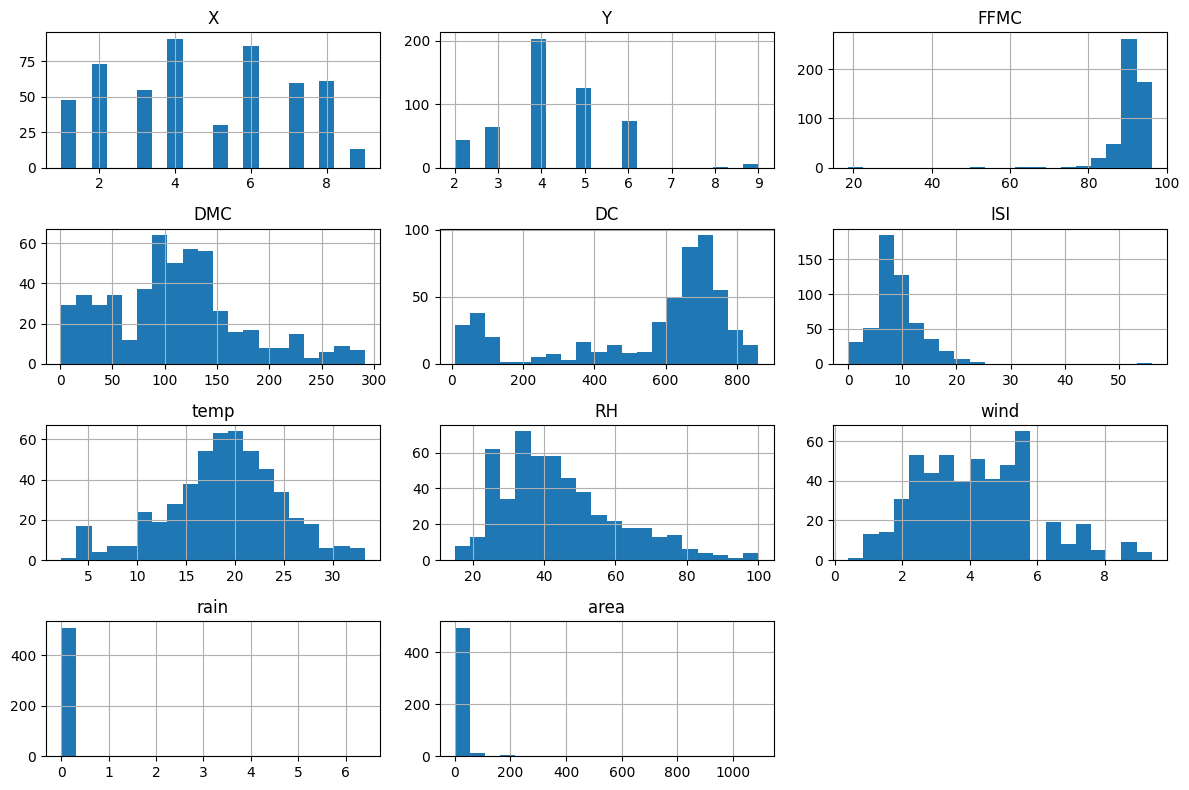

In [3]:
df.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

In [4]:
np.sort(df['area'].values)

array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.000

### Naive Linear Regression Model

In [5]:
df_without_categorical = df[[x for x in df.columns if x not in ['month', 'day']]]

X = df_without_categorical.iloc[:, :-1]
y_binary = (df_without_categorical['area'] > 0).astype(int)
y_regression = df_without_categorical['area']

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

In [6]:
logistic_regression = sklearn.linear_model.LogisticRegression(
    max_iter=100, random_state=42,
    solver='liblinear'
)
logistic_regression.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [7]:
y_pred = logistic_regression.predict(X_test)

### Naive Classification Metrics
For this task, recall is more important (to detect a fire, if there is one) than precision, so the key metric is 

$$F_{beta}\text{-}score = \frac{(1+\beta^2)tp}{(1+\beta^2)tp + fp + \beta^2fn}$$

$$\text{with } \beta = 2$$

In [8]:
metrics_values = {}

In [9]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

beta = 2
f1 = fbeta_score(y_test, y_pred, beta=2)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F{beta}-score:  {f1:.4f}")

metrics_values["drop categorical"] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F-score': f1, 'MAE': None, 'RMSE': None}

Accuracy:  0.5513
Precision: 0.5437
Recall:    0.7089
F2-score:  0.6683


### EDA

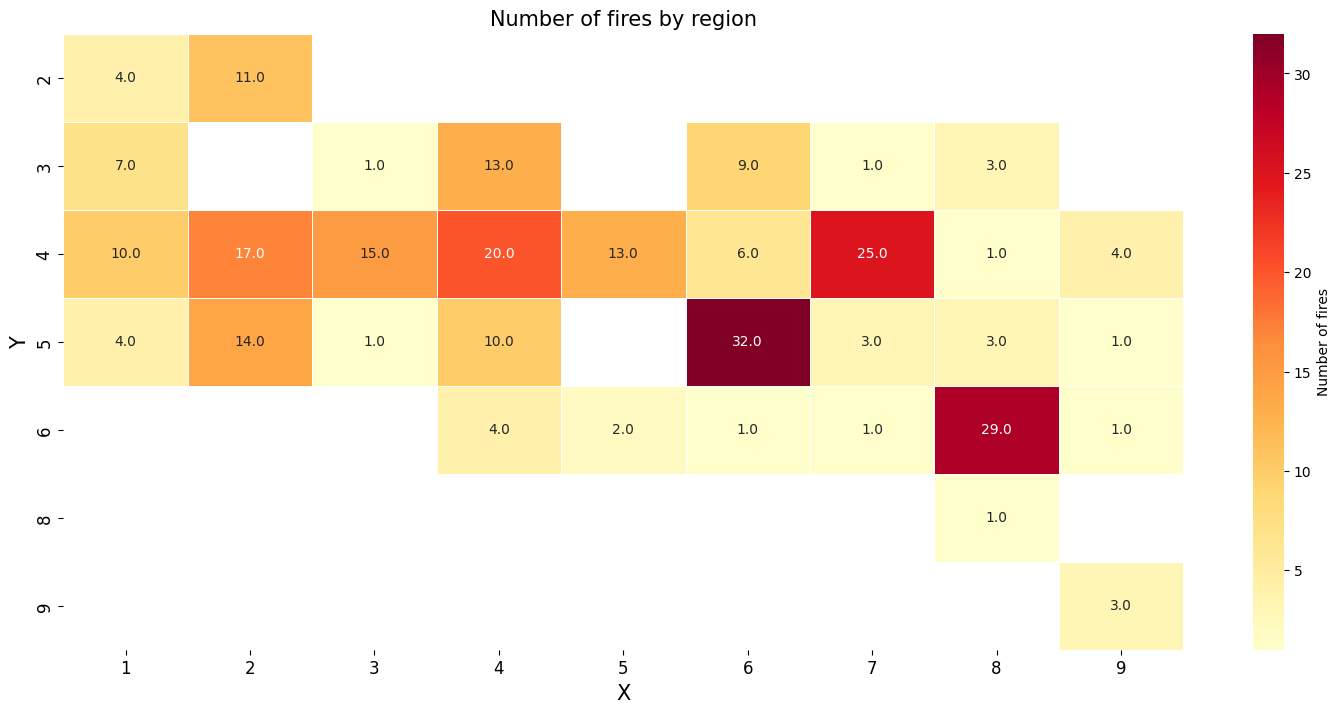

In [10]:
def XY(row):
    return (str(row['X']) + '|' + str(row['Y']))

vis = df
vis['X|Y'] = vis.apply(XY, axis = 1)
vis = vis[vis['area']!=0]
values = vis['X|Y'].to_list()
index = vis['area'].to_list()
size = pd.Series(values, index).value_counts().sort_index()

X, Y = [], []
for i in size.index:
    X.append(int(i.split('|')[0]))
    Y.append(int(i.split('|')[1]))
    
data = pd.DataFrame({'X': X, 'Y': Y, 'Number of fires': size})
heatmap_data = pd.pivot_table(data, values='Number of fires', index='Y', columns='X')

plt.figure(figsize = (14,8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt=".1f", linewidths=.5, cbar_kws={'label': 'Number of fires'},
            xticklabels=1, yticklabels=1)

plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.title('Number of fires by region', fontsize = 15)
plt.subplots_adjust(left=0, right=1)
plt.show()
df.drop('X|Y', axis=1 , inplace=True)

# Part 2

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [12]:
df = pd.read_csv('forestfires.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


Label Encoding

In [14]:
df_le = df.copy()
cat_features = ['month', 'day']
le = LabelEncoder()
for feature in cat_features:
    df_le[feature] = le.fit_transform(df_le[feature])
df_le.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [15]:
X = df_le.iloc[:, :-1]
y_binary = (df_le['area'] > 0).astype(int)
y_regression = df_le['area']

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)
logistic_regression = sklearn.linear_model.LogisticRegression(
    max_iter=100, random_state=42,
    solver='liblinear'
)
logistic_regression.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [16]:
y_pred = logistic_regression.predict(X_test)

In [17]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
y_reg_log = np.log1p(y_regression)

beta = 2
f1 = fbeta_score(y_test, y_pred, beta=2)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F{beta}-score:  {f1:.4f}")

#линейная

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg_log, test_size=0.3, random_state=42)

reg = sklearn.linear_model.LinearRegression()
reg.fit(X_train_reg, y_train_reg)
y_pred_reg = logistic_regression.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = mean_squared_error(y_test_reg, y_pred_reg)

print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

metrics_values["label encoding"] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F-score': f1, 'MAE': mae, 'RMSE': rmse}

Accuracy:  0.5385
Precision: 0.5340
Recall:    0.6962
F2-score:  0.6563
MAE:  1.0810
RMSE: 2.3092


Ordinal Encoding

In [18]:
df_ord = df.copy()

month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
day_order = ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']

ordinal_encoder = OrdinalEncoder(categories=[month_order, day_order])
df_ord[['month', 'day']] = ordinal_encoder.fit_transform(df_ord[['month', 'day']])

df_ord.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,2.0,5.0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,9.0,2.0,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,9.0,6.0,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,2.0,5.0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,2.0,0.0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [19]:
df_ord['month'].value_counts()

month
7.0     184
8.0     172
2.0      54
6.0      32
1.0      20
5.0      17
9.0      15
3.0       9
11.0      9
0.0       2
4.0       2
10.0      1
Name: count, dtype: int64

In [20]:
X = df_ord.iloc[:, :-1]
y_binary = (df_ord['area'] > 0).astype(int)
y_regression = df_ord['area']
y_reg_log = np.log1p(y_regression)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)
logistic_regression = sklearn.linear_model.LogisticRegression(
    max_iter=100, random_state=42,
    solver='liblinear'
)
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

beta = 2
f1 = fbeta_score(y_test, y_pred, beta=2)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F{beta}-score:  {f1:.4f}")

#линейная

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg_log, test_size=0.3, random_state=42)

reg = sklearn.linear_model.LinearRegression()
reg.fit(X_train_reg, y_train_reg)
y_pred_reg = logistic_regression.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = mean_squared_error(y_test_reg, y_pred_reg)

print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

metrics_values["ordinal encoding"] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F-score': f1, 'MAE': mae, 'RMSE': rmse}


Accuracy:  0.5256
Precision: 0.5248
Recall:    0.6709
F2-score:  0.6355
MAE:  1.0938
RMSE: 2.3394


One-hot-encoding

In [21]:
df_ohe = df.copy()

df_ohe = pd.get_dummies(df_ohe, columns=['month', 'day'], drop_first=False)

df_ohe.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,False,False,False,True,False,False,False,False,False,False
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,False,True,False,False,False,False,False,False,True,False
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,False,True,False,False,False,True,False,False,False,False
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,False,False,False,True,False,False,False,False,False,False
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,False,False,False,False,False,False,True,False,False,False


In [22]:
df_ohe.columns

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed'],
      dtype='object')

In [23]:
X = df_ohe.drop(columns=['area'])
y_binary = (df_ohe['area'] > 0).astype(int)
y_regression = df_ohe['area']
y_reg_log = np.log1p(y_regression)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)
logistic_regression = sklearn.linear_model.LogisticRegression(
    max_iter=100, random_state=42,
    solver='liblinear'
)
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

beta = 2
f1 = fbeta_score(y_test, y_pred, beta=2)

print(f"Accuracy:  {accuracy:.9f}")
print(f"Precision: {precision:.9f}")
print(f"Recall:    {recall:.9f}")
print(f"F{beta}-score:  {f1:.9f}")

#линейная

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg_log, test_size=0.3, random_state=42)

reg = sklearn.linear_model.LinearRegression()
reg.fit(X_train_reg, y_train_reg)
y_pred_reg = logistic_regression.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = mean_squared_error(y_test_reg, y_pred_reg)

print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


metrics_values["One-hot-encoding"] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F-score': f1, 'MAE': mae, 'RMSE': rmse}

Accuracy:  0.544871795
Precision: 0.541666667
Recall:    0.658227848
F2-score:  0.631067961
MAE:  1.0830
RMSE: 2.3539


Dummies encoding

In [24]:
df_dummy = df.copy()

df_dummy = pd.get_dummies(df_dummy, columns=['month', 'day'], drop_first=True)

display(df_dummy.head())
print('af')

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,False,False,False,False,False,False,False,False,False,False
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,False,False,True,False,False,False,False,False,True,False
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,False,False,True,False,False,True,False,False,False,False
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,False,False,False,False,False,False,False,False,False,False
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,False,False,False,False,False,False,True,False,False,False


af


In [25]:
X = df_dummy.drop(columns=['area'])
y_binary = (df_dummy['area'] > 0).astype(int)
y_regression = df_dummy['area']
y_reg_log = np.log1p(y_regression)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

logistic_regression = sklearn.linear_model.LogisticRegression(
    max_iter=100, random_state=42,
    solver='liblinear'
)
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

beta = 2
f1 = fbeta_score(y_test, y_pred, beta=2)

print(f"Accuracy:  {accuracy:.9f}")
print(f"Precision: {precision:.9f}")
print(f"Recall:    {recall:.9f}")
print(f"F{beta}-score:  {f1:.9f}")

#линейная

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg_log, test_size=0.3, random_state=42)

reg = sklearn.linear_model.LinearRegression()
reg.fit(X_train_reg, y_train_reg)
y_pred_reg = logistic_regression.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = mean_squared_error(y_test_reg, y_pred_reg)

print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


metrics_values["dummies encoding"] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F-score': f1, 'MAE': mae, 'RMSE': rmse}


Accuracy:  0.551282051
Precision: 0.546391753
Recall:    0.670886076
F2-score:  0.641646489
MAE:  1.0756
RMSE: 2.2971


Cyclic encodong

In [26]:
df_cyc = df.copy()

month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
day_order = ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']

month_map = {m: i for i, m in enumerate(month_order)}
day_map   = {d: i for i, d in enumerate(day_order)}
month_num = df_cyc['month'].map(month_map)
day_num   = df_cyc['day'].map(day_map)


df_cyc['month_sin'] = np.sin(2 * np.pi * month_num / 11)
df_cyc['month_cos'] = np.cos(2 * np.pi * month_num / 11)

df_cyc['day_sin'] = np.sin(2 * np.pi * day_num / 6)
df_cyc['day_cos'] = np.cos(2 * np.pi * day_num / 6)


df_cyc = df_cyc.drop(columns=['month', 'day'])

df_cyc.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_sin,month_cos,day_sin,day_cos
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.909632,0.415415,-8.660254e-01,0.5
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,-0.909632,0.415415,8.660254e-01,-0.5
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,-0.909632,0.415415,-2.449294e-16,1.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.909632,0.415415,-8.660254e-01,0.5
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.909632,0.415415,0.000000e+00,1.0


In [27]:
df_cyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          517 non-null    int64  
 1   Y          517 non-null    int64  
 2   FFMC       517 non-null    float64
 3   DMC        517 non-null    float64
 4   DC         517 non-null    float64
 5   ISI        517 non-null    float64
 6   temp       517 non-null    float64
 7   RH         517 non-null    int64  
 8   wind       517 non-null    float64
 9   rain       517 non-null    float64
 10  area       517 non-null    float64
 11  month_sin  517 non-null    float64
 12  month_cos  517 non-null    float64
 13  day_sin    517 non-null    float64
 14  day_cos    517 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 60.7 KB


In [28]:
X = df_cyc.drop(columns=['area'])
y_binary = (df_cyc['area'] > 0).astype(int)
y_regression = df_cyc['area']
y_reg_log = np.log1p(y_regression)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

logistic_regression = sklearn.linear_model.LogisticRegression(
    max_iter=100, random_state=42,
    solver='liblinear'
)
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

beta = 2
f1 = fbeta_score(y_test, y_pred, beta=2)

print(f"Accuracy:  {accuracy:.9f}")
print(f"Precision: {precision:.9f}")
print(f"Recall:    {recall:.9f}")
print(f"F{beta}-score:  {f1:.9f}")

#линейная

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg_log, test_size=0.3, random_state=42)

reg = sklearn.linear_model.LinearRegression()
reg.fit(X_train_reg, y_train_reg)
y_pred_reg = logistic_regression.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = mean_squared_error(y_test_reg, y_pred_reg)

print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


metrics_values["cyclic encoding"] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F-score': f1, 'MAE': mae, 'RMSE': rmse}


Accuracy:  0.557692308
Precision: 0.548076923
Recall:    0.721518987
F2-score:  0.678571429
MAE:  1.0610
RMSE: 2.2045


In [29]:
metrics_df = pd.DataFrame(metrics_values).T 
metrics_df

,Accuracy,Precision,Recall,F-score,MAE,RMSE
drop categorical,0.551282,0.543689,0.708861,0.668258,NaN,NaN
label encoding,0.538462,0.533981,0.696203,0.656325,1.081013,2.309206
ordinal encoding,0.525641,0.524752,0.670886,0.635492,1.093834,2.339416
One-hot-encoding,0.544872,0.541667,0.658228,0.631068,1.082995,2.353865
dummies encoding,0.551282,0.546392,0.670886,0.641646,1.075614,2.297076
cyclic encoding,0.557692,0.548077,0.721519,0.678571,1.061013,2.204475
